# Exemplo de reamostragem das partículas

In [1]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



## Criação das partículas e do robô

In [2]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

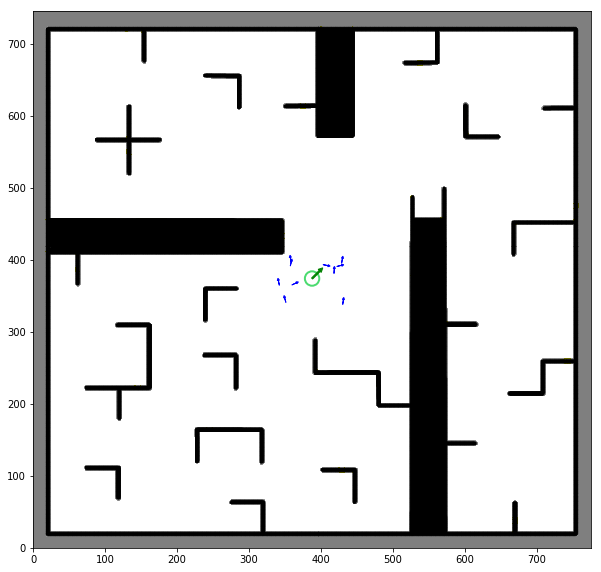

In [3]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [6]:
particulas_exp

[[428.49666229405864, 395.195761107146, 1.3925332016937961],
 [430.04900625585634, 337.88807341040336, 1.4274054560470013],
 [417.9306728556324, 380.8977895423057, 1.5081042352916574],
 [342.0697083835152, 364.547679139976, 1.7714029486591623],
 [358.1951683677989, 396.4717289612736, 1.7017219068879372],
 [359.42992815939755, 365.10579621539557, 0.43189554948008935],
 [421.85498144508455, 390.7156915027312, 0.24784426756693778],
 [402.7867527259397, 393.29623310187793, -0.20803078962487426],
 [351.11951990018093, 340.72262576874493, 1.8307383635140437],
 [357.27662125867016, 391.50159903001844, 1.3467271541816082]]

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.8, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [10]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [11]:
valores_novas_particulas

[[358.1951683677989, 396.4717289612736, 1.7017219068879372],
 [417.9306728556324, 380.8977895423057, 1.5081042352916574],
 [428.49666229405864, 395.195761107146, 1.3925332016937961],
 [428.49666229405864, 395.195761107146, 1.3925332016937961],
 [428.49666229405864, 395.195761107146, 1.3925332016937961],
 [357.27662125867016, 391.50159903001844, 1.3467271541816082],
 [359.42992815939755, 365.10579621539557, 0.43189554948008935],
 [428.49666229405864, 395.195761107146, 1.3925332016937961],
 [428.49666229405864, 395.195761107146, 1.3925332016937961],
 [430.04900625585634, 337.88807341040336, 1.4274054560470013]]

![](animated.gif)